In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

In [8]:

# ==========================================
# 1. CARGA DE DATOS
# ==========================================
ruta = "/Users/trianaflores/PycharmProjects/MD_data_understanding/data_adolescentes/adolescentes_ensanut2023_w_n.csv"

data = pd.read_csv(ruta, delimiter=";")


In [9]:
# ==========================================
# Preprocesamiento: Valores NaN
# ==========================================
data_limpio = data.copy()

pd.set_option('future.no_silent_downcasting', True)

# Convertir espacios vacíos a NaN en columnas tipo objeto
for col in data_limpio.select_dtypes(include=['object']).columns:
    data_limpio[col] = data_limpio[col].replace(' ', np.nan)

In [13]:
# ==========================================
# 2. IDENTIFICACIÓN DE VARIABLES TARGET
# ==========================================

variables_depresion = ['d0601a', 'd0601b', 'd0601c', 'd0601d', 'd0601e', 'd0601f', 'd0601g']

# Copiar datos para no alterar original
data_modelado = data.copy()
pd.set_option('future.no_silent_downcasting', True)

# Convertir variables de string a numérico, reemplazando espacios por NaN
for var in variables_depresion:
    data_modelado[var] = data_modelado[var].replace(' ', np.nan)
    data_modelado[var] = pd.to_numeric(data_modelado[var], errors='coerce')

# Crear score sumando todas las preguntas

# Invertir D0601F
data_modelado['d0601f_inv'] = 5 - data_modelado['d0601f']

# Crear score
variables_score = ['d0601a', 'd0601b', 'd0601c', 'd0601d', 'd0601e', 'd0601f_inv', 'd0601g']
# data_modelado['score_depresion'] = data_modelado[variables_score].sum(axis=1)

# Crear score con control de NaN (no cuentes filas vacías como 0)
data_modelado['score_depresion'] = data_modelado[variables_score].sum(axis=1, min_count=1)

# Serie de score válida para análisis
score_valido = pd.to_numeric(data_modelado['score_depresion'], errors='coerce').dropna()

# Punto de corte y conteos binarios
mediana = score_valido.median()
n_sin = (score_valido < mediana).sum()     # Clase 0: SIN síntomas
n_con = (score_valido >= mediana).sum()    # Clase 1: CON síntomas



In [14]:

# ==========================================
# 5. ANÁLISIS DE DISTRIBUCIÓN DEL SCORE
# ==========================================

print(f"\nEstadísticas descriptivas del score:")
print(score_valido.describe())

print(f"\nDistribución por percentiles:")
percentiles = [0, 25, 50, 75, 100]
for p in percentiles:
    valor = score_valido.quantile(p/100)
    print(f"  Percentil {p:>3}: {valor:.1f}")

mediana = score_valido.median()
p75 = score_valido.quantile(0.75)

resumen = f"""
Clasificación binaria:
• Punto de corte: MEDIANA = {mediana:.1f}
• Clase 0 (SIN síntomas): {n_sin:,} adolescentes ({(n_sin/(n_sin+n_con))*100:.1f}%)
• Clase 1 (CON síntomas): {n_con:,} adolescentes ({(n_con/(n_sin+n_con))*100:.1f}%)
"""

print(resumen)


Estadísticas descriptivas del score:
count    1924.000000
mean       10.116424
std         3.313403
min         7.000000
25%         7.000000
50%        10.000000
75%        11.000000
max        27.000000
Name: score_depresion, dtype: float64

Distribución por percentiles:
  Percentil   0: 7.0
  Percentil  25: 7.0
  Percentil  50: 10.0
  Percentil  75: 11.0
  Percentil 100: 27.0

Clasificación binaria:
• Punto de corte: MEDIANA = 10.0
• Clase 0 (SIN síntomas): 919 adolescentes (47.8%)
• Clase 1 (CON síntomas): 1,005 adolescentes (52.2%)



/var/folders/_b/5j023ykn5zb34klxky_0fjdr0000gn/T/ipykernel_1623/3450261376.py:17: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


<Figure size 1800x1000 with 0 Axes>

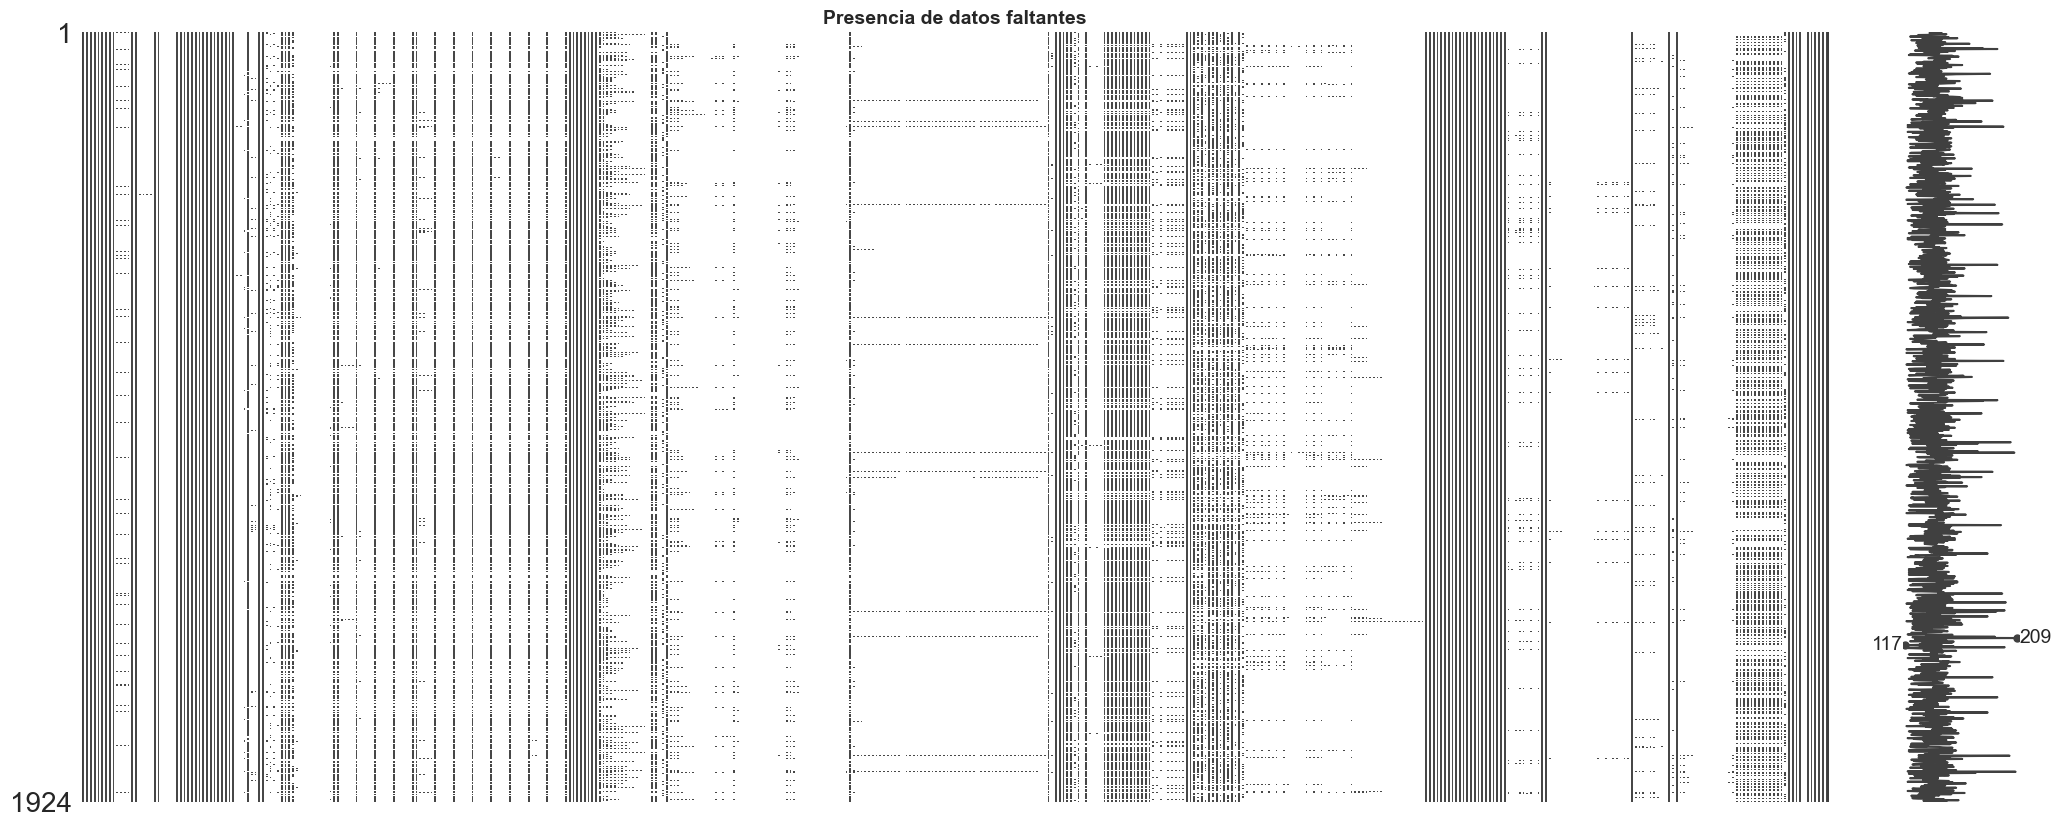

✓ Guardado: /Users/trianaflores/PycharmProjects/MD_data_understanding/data_adolescentes/02_matrix_codigo_barras.png


In [15]:
# ==========================================
# Visualizaciones Missingno
# ==========================================

import os

# Crear carpeta de salida si no existe
carpeta_salida = "/Users/trianaflores/PycharmProjects/MD_data_understanding/data_adolescentes"
os.makedirs(carpeta_salida, exist_ok=True)

# ------------------------------------------
# 2. Matriz tipo código de barras
# ------------------------------------------
plt.figure(figsize=(18,10))
msno.matrix(data_limpio)
plt.title("Presencia de datos faltantes", fontsize=14, weight='bold')
plt.tight_layout()
ruta2 = os.path.join(carpeta_salida, "02_matrix_codigo_barras.png")
plt.savefig(ruta2, dpi=300, bbox_inches="tight")
plt.show()
print(f"✓ Guardado: {ruta2}")
